In [1]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Importação dos Dados

In [2]:
df_train = pd.read_csv('./data/treino_309.csv')
df_test = pd.read_csv('./data/preprocessed_test.csv.gz', compression='gzip', sep='\t')

In [3]:
def create_split(df, target, drop_start):
    df = df.dropna()
    if 'PROPHET_NORM_FEATURES' in df:
        df.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    return df[df.columns[drop_start:]].to_numpy(), df[[target]].to_numpy().reshape(-1)

In [4]:
X_train, y_train = create_split(df_train, 'ALVO', drop_start=2)
X_test, y_test = create_split(df_test, 'ALVO', drop_start=1)

# Primeiro Modelo: Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
forest = RandomForestClassifier(max_features=25, n_estimators=100)

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_features=25)

In [28]:
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [29]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

In [30]:
metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

<AxesSubplot:>

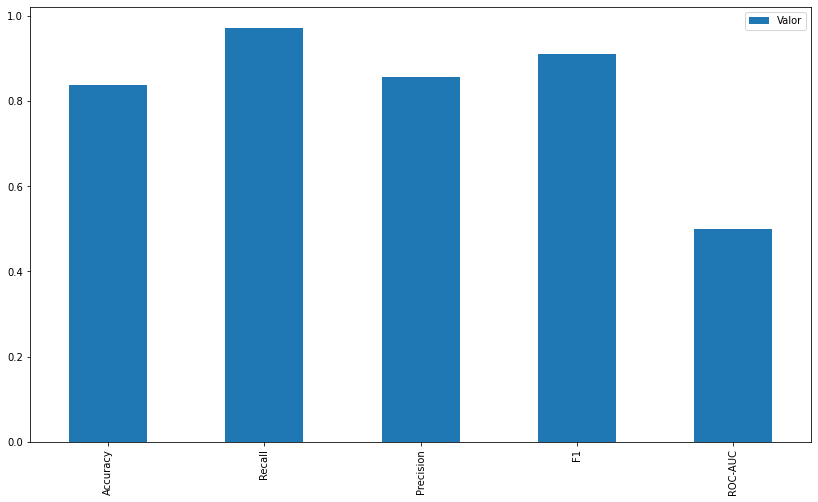

In [31]:
metrics_df.plot(kind='bar',figsize=(14,8))

In [40]:
import pickle
f = open('./models/RandomForest', 'wb')
pickle.dump(forest, f)

# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
gbrt = GradientBoostingClassifier(max_depth = 25)

In [35]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=25)

In [36]:
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

<AxesSubplot:>

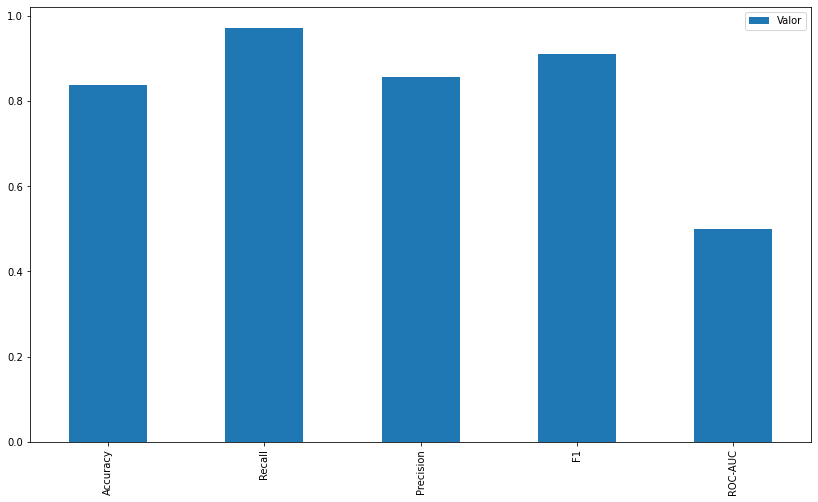

In [37]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))

In [39]:
import pickle
f = open('./models/GradientBoosting', 'wb')
pickle.dump(gbrt, f)

# Ensemble MLP

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

In [6]:
baggingClassifier = BaggingClassifier(
    base_estimator = MLPClassifier(hidden_layer_sizes = (16)),
    max_samples = 0.75,
    max_features = 0.75,
    n_estimators = 5
)

In [7]:
baggingClassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(hidden_layer_sizes=16),
                  max_features=0.75, max_samples=0.75, n_estimators=5)

In [9]:
y_pred = baggingClassifier.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

<AxesSubplot:>

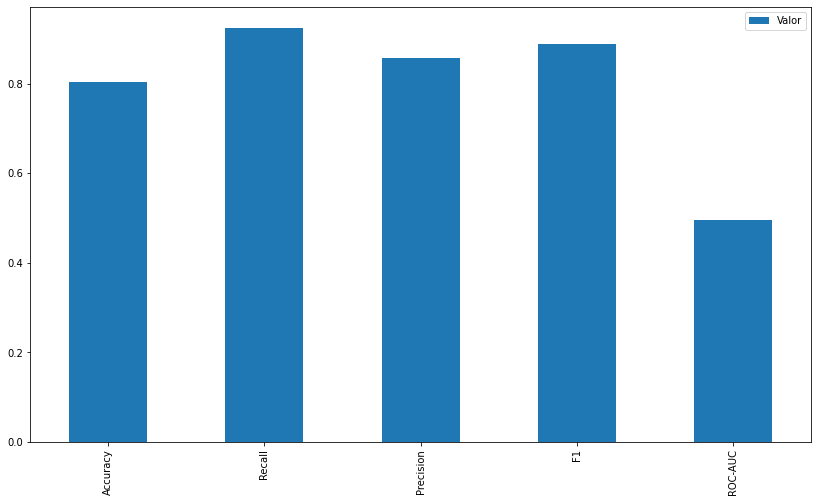

In [11]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))

In [13]:
from scipy.stats import ks_2samp

In [14]:
ks_2samp(y_pred, y_test)

KstestResult(statistic=0.06861353063574266, pvalue=0.0)

In [19]:
import pickle
f = open('./models/BaggingClassifierMLP', 'wb')
pickle.dump(baggingClassifier, f)